In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model as lm
import statsmodels.formula.api as smf

In [9]:
df = pd.read_csv('p027_2.txt', sep=";")

In [ ]:
df.columns
#df.columns = ['Minutos', 'Unidades']

In [29]:
X = np.array(df['Units']).reshape(-1,1) #Transform in one column
y = np.array(df['Minutes']).reshape(-1,1)

In [61]:
#ordinary least squares - OLS
model_2 = smf.ols('Minutes ~ Units', data=df).fit()

In [ ]:
print(model_2.summary())

In [ ]:
model_lm = lm.LinearRegression(fit_intercept=False)
model_lm.fit(X,y) #X and Y need to be arrays - not pd.Series

In [66]:
b1 = model_lm.coef_
b0 = model_lm.intercept_
yhat = b0 + b1*X

In [68]:
df['yhat02'] = yhat

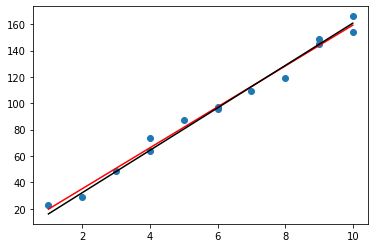

In [70]:
#plot(x,y)
plt.scatter(df['Units'],df['Minutes'])
plt.plot(df['Units'], df['yhat'], color='red')
plt.plot(df['Units'], df['yhat02'], color='black');

In [ ]:
#Least Square Error
df['Error'] = (df['Minutes']-df['yhat'])**2
print(f'SS M01: {np.sum(df["Error"])}')